In [1]:
from theano.sandbox import cuda
%matplotlib inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: CUDA driver version is insufficient for CUDA runtime version)


In [2]:
# Import modules
import csv
import shutil
import os, sys
import glob
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Set directories
HOME_DIR = os.getcwd()
DATA_PATH = 'data/invasivespecies'
DATA_HOME_DIR = os.path.abspath(HOME_DIR+'/'+DATA_PATH)

path = DATA_HOME_DIR
# Use sample?
path = path + '/sample'

train_path = path + '/train/'
valid_path = path + '/valid/'
test_path = path + '/test/'
results_path= path + '/results/'
model_path = path + '/models/'

In [3]:
# Settings
batch_size=64

# Folder ordering

## 1. Create train subdirectories and order images in labeled directories

In [6]:
print(path)

/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies


In [8]:
# Move train folder to backup and rename to train_unordered
%mkdir $DATA_HOME_DIR/backup
%mv $DATA_HOME_DIR/train $DATA_HOME_DIR/backup
%mv $DATA_HOME_DIR/backup/train $DATA_HOME_DIR/backup/train_unordered

mkdir: cannot create directory ‘/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/backup’: File exists
mv: cannot stat '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/train': No such file or directory


In [9]:
# Change test folder to test/unknown
%mv $DATA_HOME_DIR/test $DATA_HOME_DIR/unknown
%mkdir $DATA_HOME_DIR/test
%mv $DATA_HOME_DIR/unknown $DATA_HOME_DIR/test

In [10]:
# Remove all folders created by this script (not test/ and backup/)
%rm -r $DATA_HOME_DIR/results/
%rm -r $DATA_HOME_DIR/valid/
%rm -r $DATA_HOME_DIR/sample/
%rm -r $DATA_HOME_DIR/train/
%rm -r $DATA_HOME_DIR/models/

rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/results/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/valid/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/train/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/models/': No such file or directory


In [11]:
# Create directories
%mkdir -p $DATA_HOME_DIR/train/invasive/
%mkdir -p $DATA_HOME_DIR/train/non_invasive/
%mkdir -p $DATA_HOME_DIR/results/
%mkdir -p $DATA_HOME_DIR/models/

In [12]:
def list_pictures_by_label(csvfile):
    plantfile = []
    both = []
    labels = []
    with open(DATA_HOME_DIR+'/'+csvfile+'.csv', 'rb') as f:
        train_labels = csv.reader(f, delimiter=' ')
        temp = next(train_labels)
        for row in train_labels:
            both.append(row)
            plantfile.append(int(row[0][:-2]))
            labels.append(int(row[0][-1:]))
    invasive = [str(plantfile[i])+'.jpg' for i,x in enumerate(labels) if x==1]
    non_invasive = [str(plantfile[i])+'.jpg' for i,x in enumerate(labels) if x==0]
    return invasive, non_invasive

def copy_files_from_train_to_trainlabel(invasive, non_invasive):
    for i in range(len(invasive)):
        shutil.move(DATA_HOME_DIR+'/backup/train_unordered/'+invasive[i], DATA_HOME_DIR+'/train/invasive/')
    for j in range(len(non_invasive)):
        shutil.move(DATA_HOME_DIR+'/backup/train_unordered/'+non_invasive[j], DATA_HOME_DIR+'/train/non_invasive/')

In [16]:
copy_files_from_train_to_trainlabel(*list_pictures_by_label('train_labels'))

## 2. Create valid and sample directories

In [17]:
# Create directories
%mkdir -p $DATA_HOME_DIR/valid/invasive
%mkdir -p $DATA_HOME_DIR/valid/non_invasive
%mkdir -p $DATA_HOME_DIR/results

In [18]:
def move_from_train_to_valid():
    dirs = os.listdir(DATA_HOME_DIR+'/train')
    print(dirs)
    for iterator in dirs:
        if os.listdir(DATA_HOME_DIR+'/valid/'+iterator+'/') == []:
            g = glob.glob(DATA_HOME_DIR+'/train/'+iterator+'/'+'*.jpg')
            shuf = np.random.permutation(g)
            for i in range(int(math.ceil(0.08*len(g)))):
#                 print(DATA_HOME_DIR+'/valid/'+iterator+'/'+ os.path.basename(shuf[i]))
                shutil.move(shuf[i], DATA_HOME_DIR+'/valid/'+iterator+'/'+ os.path.basename(shuf[i]))
        else:
            print('/valid/'+ str(iterator)+ 'folder not empty')

In [19]:
move_from_train_to_valid()

['invasive', 'non_invasive']


In [20]:
# Remove directories
%rm -r $DATA_HOME_DIR/sample/results/
%rm -r $DATA_HOME_DIR/sample/valid/invasive/
%rm -r $DATA_HOME_DIR/sample/valid/non_invasive/
%rm -r $DATA_HOME_DIR/sample/train/invasive/
%rm -r $DATA_HOME_DIR/sample/train/non_invasive/
%rm -r $DATA_HOME_DIR/sample/test/unknown
%rm -r $DATA_HOME_DIR/sample/models/

rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/results/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/valid/invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/valid/non_invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/train/invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/train/non_invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/test/unknown': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/models/': No such file or directory


In [21]:
# Create directories
%mkdir -p $DATA_HOME_DIR/sample/results/
%mkdir -p $DATA_HOME_DIR/sample/valid/invasive/
%mkdir -p $DATA_HOME_DIR/sample/valid/non_invasive/
%mkdir -p $DATA_HOME_DIR/sample/train/invasive/
%mkdir -p $DATA_HOME_DIR/sample/train/non_invasive/
%mkdir -p $DATA_HOME_DIR/sample/test/unknown
%mkdir -p $DATA_HOME_DIR/sample/models/

In [22]:
def create_samplefolder():
    dirs = os.listdir(DATA_HOME_DIR+'/train')
    if os.listdir(DATA_HOME_DIR+'/sample/train/'+dirs[0]+'/') == []:
        for iterator in dirs:
            g = glob.glob(DATA_HOME_DIR+'/train/'+iterator+'/'+'*.jpg')
            shuf = np.random.permutation(g)
            for i in range(20):
                shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/'+iterator+'/'+ os.path.basename(shuf[i]))
            for i in range(10):
                shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/'+iterator+'/'+ os.path.basename(shuf[i]))
    else:
        print('/sample/train/ or /sample/valid/ folder not empty')
    if os.listdir(DATA_HOME_DIR+'/sample/test/unknown/') == []:
        g = glob.glob(DATA_HOME_DIR+'/test/unknown/'+'*.jpg')
        shuf = np.random.permutation(g)
        for i in range(10):
                    shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/test/unknown/'+ os.path.basename(shuf[i]))
    else:
        print('/sample/test/unknown/ folder not empty')

In [23]:
create_samplefolder()

# plot loss

In [48]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import Callback

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []

    def on_batch_end(self, batch, logs={}):
        self.loss = np.append(self.loss, logs.get('loss'))
        self.acc = np.append(self.acc, logs.get('acc'))
        
    def on_epoch_end(self, batch, logs={}):
        self.val_loss = np.append(self.val_loss, logs.get('val_loss'))
        self.val_acc = np.append(self.val_acc, logs.get('val_acc'))

In [ ]:
model = Sequential([
    BatchNormalization(input_shape=(3,224,224)),
    Flatten(),
    Dense(100, activation='softmax'),
    Dense(2, activation='softmax')
])

In [253]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [254]:
model.summary()
history = LossHistory()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_17 (BatchNorm (None, 3, 224, 224)   896         batchnormalization_input_17[0][0]
____________________________________________________________________________________________________
flatten_17 (Flatten)             (None, 150528)        0           batchnormalization_17[0][0]      
____________________________________________________________________________________________________
dense_33 (Dense)                 (None, 100)           15052900    flatten_17[0][0]                 
____________________________________________________________________________________________________
dense_34 (Dense)                 (None, 2)             202         dense_33[0][0]                   
Total params: 15,053,998
Trainable params: 15,053,550
Non-trainable params: 448
___________

In [255]:
nb_epoch = 10
model.fit_generator(batches, batches.nb_sample, nb_epoch=nb_epoch, 
                    validation_data=valbatches, nb_val_samples=valbatches.nb_sample, callbacks=[history])

Epoch 1/10
40/40 [==============================] - 3s - loss: 0.6877 - acc: 0.6000 - val_loss: 0.7057 - val_acc: 0.5000
Epoch 2/10
40/40 [==============================] - 4s - loss: 0.6107 - acc: 0.9000 - val_loss: 0.7093 - val_acc: 0.5000
Epoch 3/10
40/40 [==============================] - 3s - loss: 0.5991 - acc: 0.9250 - val_loss: 0.7095 - val_acc: 0.5000
Epoch 4/10
40/40 [==============================] - 3s - loss: 0.5979 - acc: 0.9500 - val_loss: 0.7216 - val_acc: 0.4000
Epoch 5/10
40/40 [==============================] - 3s - loss: 0.5978 - acc: 0.9250 - val_loss: 0.7284 - val_acc: 0.4000
Epoch 6/10
40/40 [==============================] - 2s - loss: 0.5974 - acc: 0.9250 - val_loss: 0.7218 - val_acc: 0.4000
Epoch 7/10
40/40 [==============================] - 2s - loss: 0.5963 - acc: 0.9500 - val_loss: 0.7117 - val_acc: 0.4000
Epoch 8/10
40/40 [==============================] - 2s - loss: 0.5955 - acc: 0.9500 - val_loss: 0.7031 - val_acc: 0.4500
Epoch 9/10
40/40 [==============

(0, 1)

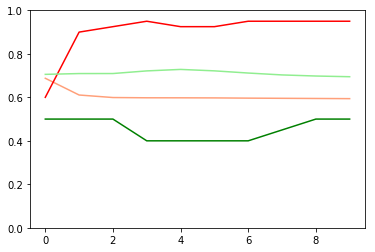

In [256]:
x = range(nb_epoch)
plt.plot(x, history.loss, color ='lightsalmon')
plt.plot(x, history.acc, color ='red')
plt.plot(x, history.val_loss, color ='lightgreen')
plt.plot(x, history.val_acc, color ='green')
plt.ylim(0,1)


# Create batches

In [4]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()
batches = gen.flow_from_directory(train_path, target_size=(224,224), batch_size=batch_size, class_mode='categorical')
val_batches = gen.flow_from_directory(valid_path, target_size=(224,224), batch_size=batch_size, class_mode='categorical')

Using Theano backend.


Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Simple model

In [37]:
import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D

model = Sequential([
    BatchNormalization(axis=1, input_shape=(3,224,224)),
    Convolution2D(32,3,3, activation='relu'),
    Flatten(),
    Dense(2, activation='softmax')
    ])

In [38]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
40/40 [==============================] - 3s - loss: 0.7355 - acc: 0.4250 - val_loss: 6.8344 - val_acc: 0.5000


In [40]:
keras.optimizers.lr=0.001

In [41]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
40/40 [==============================] - 4s - loss: 0.4381 - acc: 0.8000 - val_loss: 5.8675 - val_acc: 0.5000


In [40]:
keras.optimizers.lr=0.0001

In [42]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
40/40 [==============================] - 4s - loss: 0.2724 - acc: 0.9750 - val_loss: 3.0364 - val_acc: 0.5000
Epoch 2/2
40/40 [==============================] - 3s - loss: 0.1663 - acc: 0.9750 - val_loss: 0.9849 - val_acc: 0.7500


In [46]:
keras.optimizers.lr=0.001

In [47]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=8, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/8
40/40 [==============================] - 4s - loss: 0.1029 - acc: 1.0000 - val_loss: 0.1745 - val_acc: 0.9000
Epoch 2/8
40/40 [==============================] - 2s - loss: 0.0656 - acc: 1.0000 - val_loss: 0.0204 - val_acc: 1.0000
Epoch 3/8
40/40 [==============================] - 2s - loss: 0.0435 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 4/8
40/40 [==============================] - 3s - loss: 0.0301 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 5/8
40/40 [==============================] - 3s - loss: 0.0216 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 6/8
40/40 [==============================] - 2s - loss: 0.0160 - acc: 1.0000 - val_loss: 7.9904e-04 - val_acc: 1.0000
Epoch 7/8
40/40 [==============================] - 3s - loss: 0.0120 - acc: 1.0000 - val_loss: 7.2360e-04 - val_acc: 1.0000
Epoch 8/8
40/40 [==============================] - 2s - loss: 0.0092 - acc: 1.0000 - val_loss: 7.1036e-04 - val_acc: 1.0000


In [48]:
model.predict_generator(val_batches, val_batches.nb_sample)

array([[  9.99358594e-01,   6.41429215e-04],
       [  9.99243259e-01,   7.56757683e-04],
       [  9.97390687e-01,   2.60930089e-03],
       [  9.99941885e-01,   5.81216373e-05],
       [  9.97599483e-01,   2.40053725e-03],
       [  9.98596430e-01,   1.40359858e-03],
       [  9.94438767e-01,   5.56123955e-03],
       [  9.99588490e-01,   4.11539600e-04],
       [  9.99900818e-01,   9.91986890e-05],
       [  9.99781668e-01,   2.18356334e-04],
       [  2.34228359e-10,   1.00000000e+00],
       [  5.51008910e-08,   9.99999940e-01],
       [  1.32320820e-05,   9.99986768e-01],
       [  2.97568103e-08,   1.00000000e+00],
       [  9.64090873e-07,   9.99999046e-01],
       [  1.74064585e-08,   1.00000000e+00],
       [  3.41371219e-07,   9.99999642e-01],
       [  6.63244373e-06,   9.99993384e-01],
       [  2.61177320e-08,   1.00000000e+00],
       [  1.99706506e-06,   9.99997973e-01]], dtype=float32)

In [44]:
def prediction(path):
    gen = image.ImageDataGenerator()
    batches = gen.flow_from_directory(path, target_size=(224,224), shuffle=False)
    return batches, model.predict_generator(batches, batches.nb_sample)
    
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
val_batches, probs = prediction(valid_path)
filenames = val_batches.filenames
expected_labels = val_batches.classes
our_preds = probs[:,0]
our_labels = np.round(1-our_preds)

n_view=4
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles = titles)

Found 20 images belonging to 2 classes.


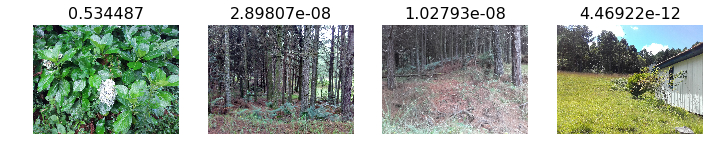

In [50]:
from numpy.random import permutation
correct = np.where(our_labels == expected_labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, our_preds[idx])

# VGG model

In [18]:
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.layers.convolutional import ZeroPadding2D, Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.utils.data_utils import get_file

import numpy as np
import json
import keras

vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))
def vgg_preprocess(x):
    x = x - vgg_mean
    return x[:, ::-1]

def createvgg():
    model = Sequential([
        Lambda(vgg_preprocess, input_shape=(3,224,224), output_shape=(3,224,224)),

        ZeroPadding2D((1,1)),
        Convolution2D(64, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(64, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(128, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(128, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(256, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(256, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(256, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        Flatten(),

        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),

        Dense(1000, activation='softmax')
    ])

    FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'
    cpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
    with open(cpath) as f: 
        class_dict = json.load(f)
    classes = [class_dict[str(i)][1] for i in range(len(class_dict))]
    mpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
    model.load_weights(mpath)
    return model

In [22]:
model = createvgg()

In [23]:
model.pop()
for layer in model.layers: 
    layer.trainable=False
model.add(Dense(2, activation='softmax'))

In [24]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=2, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
40/40 [==============================] - 25s - loss: 1.3549 - acc: 0.5250 - val_loss: 0.9406 - val_acc: 0.4500
Epoch 2/2
40/40 [==============================] - 24s - loss: 0.8928 - acc: 0.6500 - val_loss: 0.9330 - val_acc: 0.4500


In [26]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=2, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/2
40/40 [==============================] - 25s - loss: 1.1522 - acc: 0.4750 - val_loss: 0.9260 - val_acc: 0.4500
Epoch 2/2
40/40 [==============================] - 24s - loss: 1.2770 - acc: 0.4750 - val_loss: 0.9189 - val_acc: 0.4500


In [27]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
40/40 [==============================] - 27s - loss: 0.9982 - acc: 0.6000 - val_loss: 0.9120 - val_acc: 0.4500
Epoch 2/4
40/40 [==============================] - 26s - loss: 1.3860 - acc: 0.3750 - val_loss: 0.9051 - val_acc: 0.4500
Epoch 3/4
40/40 [==============================] - 28s - loss: 1.1858 - acc: 0.5750 - val_loss: 0.8982 - val_acc: 0.4500
Epoch 4/4
40/40 [==============================] - 28s - loss: 1.5031 - acc: 0.4250 - val_loss: 0.8916 - val_acc: 0.4500


In [30]:
keras.optimizers.lr=0.001

In [31]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
40/40 [==============================] - 28s - loss: 1.4260 - acc: 0.4500 - val_loss: 0.8850 - val_acc: 0.4500
Epoch 2/4
40/40 [==============================] - 27s - loss: 0.8301 - acc: 0.6000 - val_loss: 0.8785 - val_acc: 0.4000
Epoch 3/4
40/40 [==============================] - 25s - loss: 1.0298 - acc: 0.5000 - val_loss: 0.8721 - val_acc: 0.4000
Epoch 4/4
40/40 [==============================] - 25s - loss: 1.3659 - acc: 0.4000 - val_loss: 0.8657 - val_acc: 0.4000


In [32]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=8, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/8
40/40 [==============================] - 25s - loss: 1.1704 - acc: 0.5500 - val_loss: 0.8593 - val_acc: 0.4000
Epoch 2/8
40/40 [==============================] - 24s - loss: 1.3412 - acc: 0.3750 - val_loss: 0.8529 - val_acc: 0.4000
Epoch 3/8
40/40 [==============================] - 25s - loss: 1.1077 - acc: 0.5750 - val_loss: 0.8467 - val_acc: 0.4000
Epoch 4/8
40/40 [==============================] - 28s - loss: 1.1418 - acc: 0.5250 - val_loss: 0.8405 - val_acc: 0.4000
Epoch 5/8
40/40 [==============================] - 27s - loss: 0.8781 - acc: 0.5750 - val_loss: 0.8345 - val_acc: 0.4000
Epoch 6/8
40/40 [==============================] - 26s - loss: 1.2964 - acc: 0.5750 - val_loss: 0.8285 - val_acc: 0.4500
Epoch 7/8
40/40 [==============================] - 26s - loss: 1.2587 - acc: 0.4500 - val_loss: 0.8226 - val_acc: 0.4500
Epoch 8/8
40/40 [==============================] - 27s - loss: 0.7798 - acc: 0.6000 - val_loss: 0.8170 - val_acc: 0.4500


In [33]:
keras.optimizers.lr=0.0001

In [34]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=8, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/8
40/40 [==============================] - 27s - loss: 0.8893 - acc: 0.6250 - val_loss: 0.8114 - val_acc: 0.4500
Epoch 2/8
40/40 [==============================] - 25s - loss: 1.2097 - acc: 0.5750 - val_loss: 0.8058 - val_acc: 0.4500
Epoch 3/8
40/40 [==============================] - 26s - loss: 1.4770 - acc: 0.5000 - val_loss: 0.8001 - val_acc: 0.4500
Epoch 4/8
40/40 [==============================] - 27s - loss: 1.0062 - acc: 0.5500 - val_loss: 0.7945 - val_acc: 0.4500
Epoch 5/8
40/40 [==============================] - 28s - loss: 1.6455 - acc: 0.4750 - val_loss: 0.7890 - val_acc: 0.4500
Epoch 6/8
40/40 [==============================] - 27s - loss: 0.8992 - acc: 0.5500 - val_loss: 0.7836 - val_acc: 0.4500
Epoch 7/8
40/40 [==============================] - 32s - loss: 0.9538 - acc: 0.5750 - val_loss: 0.7784 - val_acc: 0.4500
Epoch 8/8
40/40 [==============================] - 28s - loss: 1.1348 - acc: 0.6250 - val_loss: 0.7731 - val_acc: 0.5000


In [35]:
keras.optimizers.lr=0.00001

In [36]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
40/40 [==============================] - 31s - loss: 0.9633 - acc: 0.5500 - val_loss: 0.7680 - val_acc: 0.5000
Epoch 2/4
40/40 [==============================] - 27s - loss: 1.3751 - acc: 0.5500 - val_loss: 0.7631 - val_acc: 0.5000
Epoch 3/4
40/40 [==============================] - 25s - loss: 0.7679 - acc: 0.6750 - val_loss: 0.7580 - val_acc: 0.5000
Epoch 4/4
40/40 [==============================] - 27s - loss: 0.6044 - acc: 0.7500 - val_loss: 0.7531 - val_acc: 0.5000


In [37]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=8, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/8
40/40 [==============================] - 28s - loss: 1.1115 - acc: 0.6000 - val_loss: 0.7483 - val_acc: 0.5500
Epoch 2/8
40/40 [==============================] - 28s - loss: 1.1043 - acc: 0.5500 - val_loss: 0.7437 - val_acc: 0.5500
Epoch 3/8
40/40 [==============================] - 26s - loss: 1.2497 - acc: 0.4500 - val_loss: 0.7390 - val_acc: 0.5500
Epoch 4/8
40/40 [==============================] - 29s - loss: 1.0919 - acc: 0.5500 - val_loss: 0.7343 - val_acc: 0.5500
Epoch 5/8
40/40 [==============================] - 30s - loss: 1.6105 - acc: 0.4250 - val_loss: 0.7297 - val_acc: 0.5500
Epoch 6/8
40/40 [==============================] - 27s - loss: 0.8823 - acc: 0.6500 - val_loss: 0.7252 - val_acc: 0.6000
Epoch 7/8
40/40 [==============================] - 27s - loss: 0.7335 - acc: 0.7250 - val_loss: 0.7209 - val_acc: 0.6000
Epoch 8/8
40/40 [==============================] - 27s - loss: 0.8345 - acc: 0.7000 - val_loss: 0.7165 - val_acc: 0.6000


In [38]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=8, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/8
40/40 [==============================] - 26s - loss: 0.8539 - acc: 0.5750 - val_loss: 0.7123 - val_acc: 0.6000
Epoch 2/8
40/40 [==============================] - 25s - loss: 0.9766 - acc: 0.5500 - val_loss: 0.7082 - val_acc: 0.6000
Epoch 3/8
40/40 [==============================] - 26s - loss: 1.0337 - acc: 0.6000 - val_loss: 0.7039 - val_acc: 0.6000
Epoch 4/8
40/40 [==============================] - 26s - loss: 1.0385 - acc: 0.6250 - val_loss: 0.6998 - val_acc: 0.6000
Epoch 5/8
40/40 [==============================] - 26s - loss: 0.7144 - acc: 0.7000 - val_loss: 0.6956 - val_acc: 0.6000
Epoch 6/8
40/40 [==============================] - 27s - loss: 0.8333 - acc: 0.6000 - val_loss: 0.6914 - val_acc: 0.6000
Epoch 7/8
40/40 [==============================] - 25s - loss: 0.7509 - acc: 0.6500 - val_loss: 0.6874 - val_acc: 0.6000
Epoch 8/8
40/40 [==============================] - 25s - loss: 1.0939 - acc: 0.5750 - val_loss: 0.6836 - val_acc: 0.6000


In [39]:
keras.optimizers.lr=0.000001

In [40]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
40/40 [==============================] - 27s - loss: 1.0530 - acc: 0.5250 - val_loss: 0.6798 - val_acc: 0.6000
Epoch 2/4
40/40 [==============================] - 26s - loss: 1.1458 - acc: 0.5500 - val_loss: 0.6758 - val_acc: 0.6000
Epoch 3/4
40/40 [==============================] - 25s - loss: 1.0954 - acc: 0.4500 - val_loss: 0.6719 - val_acc: 0.6000
Epoch 4/4
40/40 [==============================] - 26s - loss: 1.2276 - acc: 0.5750 - val_loss: 0.6681 - val_acc: 0.6000


In [41]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
40/40 [==============================] - 29s - loss: 0.9492 - acc: 0.4750 - val_loss: 0.6642 - val_acc: 0.6000
Epoch 2/4
40/40 [==============================] - 29s - loss: 1.1638 - acc: 0.4000 - val_loss: 0.6602 - val_acc: 0.6000
Epoch 3/4
40/40 [==============================] - 27s - loss: 0.8439 - acc: 0.6000 - val_loss: 0.6563 - val_acc: 0.6000
Epoch 4/4
40/40 [==============================] - 29s - loss: 0.9252 - acc: 0.7000 - val_loss: 0.6526 - val_acc: 0.6000


# VGG with batchnorm and training.log

In [4]:
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.layers.convolutional import ZeroPadding2D, Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.data_utils import get_file
from keras.callbacks import CSVLogger

import numpy as np
import json
import keras

vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))
def vgg_preprocess(x):
    x = x - vgg_mean
    return x[:, ::-1]

def createvggbn():
    model = Sequential([
        Lambda(vgg_preprocess, input_shape=(3,224,224), output_shape=(3,224,224)),

        ZeroPadding2D((1,1)),
        Convolution2D(64, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(64, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(128, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(128, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(256, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(256, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(256, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        ZeroPadding2D((1,1)),
        Convolution2D(512, 3, 3, activation='relu'),
        MaxPooling2D((2,2), strides=(2,2)),

        Flatten(),

        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1000, activation='softmax')
    ])

    FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'
    cpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
    with open(cpath) as f: 
        class_dict = json.load(f)
    classes = [class_dict[str(i)][1] for i in range(len(class_dict))]
    mpath = get_file('vgg16_bn.h5', FILES_PATH+'vgg16_bn.h5', cache_subdir='models')
    model.load_weights(mpath)
    
    #clear callback history
    filename = "training.log"
    f = open(filename, "w+")
    f.close()
    
    return model

csv_logger = CSVLogger('training.log', append=True)

Using Theano backend.


In [147]:
import pandas as pd
def plot_progress():
    df = pd.read_csv('training.log')
    history = df.as_matrix

    x = range(df.values.shape[0])
    x_ticks = df.values[:,0].astype(int)

    plt.plot(x, df.values[:,1], color ='red', label='acc')
    plt.plot(x, df.values[:,2], color ='lightsalmon', label='loss')
    plt.plot(x, df.values[:,3], color ='green', label='val_acc')
    plt.plot(x, df.values[:,4], color ='lightgreen', label='val_loss')
    plt.ylim(0,)
    plt.xticks(x, x_ticks)
    plt.legend()

In [144]:
modelbn = createvggbn()

In [145]:
modelbn.pop()
for layer in modelbn.layers: 
    layer.trainable=False
modelbn.add(Dense(2, activation='softmax'))

In [146]:
from keras.optimizers import Adam
modelbn.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/2
40/40 [==============================] - 27s - loss: 2.5081 - acc: 0.4500 - val_loss: 0.9685 - val_acc: 0.5500
Epoch 2/2
40/40 [==============================] - 26s - loss: 2.0879 - acc: 0.5250 - val_loss: 0.9638 - val_acc: 0.5500


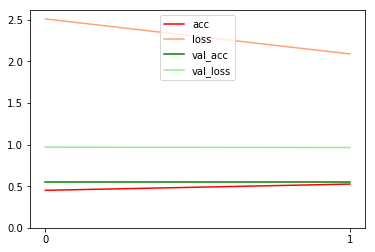

In [148]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=2, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])
plot_progress()

Epoch 1/2
40/40 [==============================] - 27s - loss: 2.1125 - acc: 0.5500 - val_loss: 0.9599 - val_acc: 0.5500
Epoch 2/2
40/40 [==============================] - 26s - loss: 2.0318 - acc: 0.5250 - val_loss: 0.9563 - val_acc: 0.5500


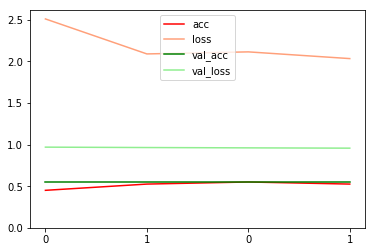

In [149]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=2, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])
plot_progress()

In [55]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])

Epoch 1/4
40/40 [==============================] - 28s - loss: 1.6439 - acc: 0.5250 - val_loss: 1.1156 - val_acc: 0.6000
Epoch 2/4
40/40 [==============================] - 31s - loss: 2.7275 - acc: 0.5500 - val_loss: 1.1101 - val_acc: 0.6000
Epoch 3/4
40/40 [==============================] - 28s - loss: 2.4395 - acc: 0.5000 - val_loss: 1.1046 - val_acc: 0.6000
Epoch 4/4
40/40 [==============================] - 27s - loss: 2.4338 - acc: 0.5500 - val_loss: 1.0994 - val_acc: 0.6000


In [56]:
keras.optimizers.lr=0.001

In [57]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])

Epoch 1/4
40/40 [==============================] - 29s - loss: 2.0116 - acc: 0.6250 - val_loss: 1.0936 - val_acc: 0.6000
Epoch 2/4
40/40 [==============================] - 32s - loss: 2.1259 - acc: 0.5250 - val_loss: 1.0889 - val_acc: 0.6000
Epoch 3/4
40/40 [==============================] - 28s - loss: 2.4641 - acc: 0.5250 - val_loss: 1.0831 - val_acc: 0.6000
Epoch 4/4
40/40 [==============================] - 26s - loss: 2.0725 - acc: 0.5500 - val_loss: 1.0768 - val_acc: 0.6000


In [66]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])

Epoch 1/4
40/40 [==============================] - 25s - loss: 2.0884 - acc: 0.6000 - val_loss: 1.0707 - val_acc: 0.6000
Epoch 2/4
40/40 [==============================] - 28s - loss: 1.6929 - acc: 0.7250 - val_loss: 1.0651 - val_acc: 0.6000
Epoch 3/4
40/40 [==============================] - 28s - loss: 1.8738 - acc: 0.5000 - val_loss: 1.0595 - val_acc: 0.6000
Epoch 4/4
40/40 [==============================] - 27s - loss: 2.2405 - acc: 0.6000 - val_loss: 1.0517 - val_acc: 0.6000


In [67]:
keras.optimizers.lr=0.0001

In [69]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=8, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])

Epoch 1/8
40/40 [==============================] - 28s - loss: 1.5901 - acc: 0.4750 - val_loss: 1.0455 - val_acc: 0.6000
Epoch 2/8
40/40 [==============================] - 27s - loss: 1.6834 - acc: 0.5000 - val_loss: 1.0391 - val_acc: 0.6000
Epoch 3/8
40/40 [==============================] - 28s - loss: 2.2529 - acc: 0.5500 - val_loss: 1.0322 - val_acc: 0.6000
Epoch 4/8
40/40 [==============================] - 26s - loss: 1.9695 - acc: 0.6250 - val_loss: 1.0258 - val_acc: 0.6000
Epoch 5/8
40/40 [==============================] - 29s - loss: 2.1703 - acc: 0.4750 - val_loss: 1.0192 - val_acc: 0.6000
Epoch 6/8
40/40 [==============================] - 28s - loss: 2.3241 - acc: 0.5750 - val_loss: 1.0143 - val_acc: 0.6000
Epoch 7/8
40/40 [==============================] - 28s - loss: 1.6215 - acc: 0.6000 - val_loss: 1.0089 - val_acc: 0.6000
Epoch 8/8
40/40 [==============================] - 27s - loss: 1.6215 - acc: 0.6250 - val_loss: 1.0029 - val_acc: 0.6000


In [71]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])

Epoch 1/1
40/40 [==============================] - 27s - loss: 1.5792 - acc: 0.6000 - val_loss: 0.9970 - val_acc: 0.6000


In [72]:
modelbn.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.nb_sample, callbacks=[csv_logger])

Epoch 1/1
40/40 [==============================] - 29s - loss: 1.7198 - acc: 0.5750 - val_loss: 0.9914 - val_acc: 0.6000


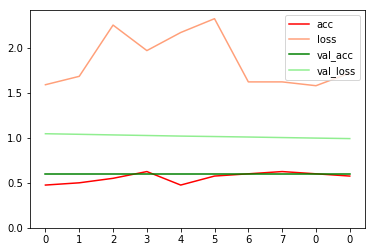

In [142]:
plot_progress()

# VGGbn met pseudo labeling - lesson 7

uitleg:
http://wiki.fast.ai/index.php/Lesson_6_Timeline
vooorbeelden:
statefarm.ipynb
lesson7.ipynb

# VGGbn with ensembling

## Plan

1. Split up models and pre-calculate dataset at several stages of the network:
    * Pre-calculate after image pre-processing to save time
    * Split at end of conv part and pre-calculate
    * Split before last layers and pre-calculate
2. Training for each of ensemble models
    * Train last layer
    * Copy weights of last layer to same layers on dense part
    * Train dense part
    * Copy weights of dense part to same layers on full part
    * Do multiple times
3. Predict and average
    * Predict with all models and take the average

## 1. Split up and pre-calculate

In [81]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.layers.convolutional import ZeroPadding2D, Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_crossentropy, categorical_accuracy
import bcolz

In [6]:
vggbn = createvggbn()
vggbn.pop()
vggbn.add(Dense(2, activation='softmax'))

In [7]:
def split_before_last_occu(model, layer_type):
    layers = model.layers
    layer_idx = [index for index,layer in enumerate(layers) if type(layer) is layer_type][-1]
    return layers[:layer_idx], layers[layer_idx:]

Split up all models and build new models of them

In [8]:
# Why do you split before maxpooling
conv_layers, fc_layers = split_before_last_occu(vggbn, MaxPooling2D)
residu_layers, last_layers = split_before_last_occu(vggbn, BatchNormalization)

In [10]:
conv_model = Sequential(conv_layers)
residu_model = Sequential(residu_layers)

Generate batches


In [11]:
shuffle = False
data_gen = ImageDataGenerator()
batches = data_gen.flow_from_directory(train_path, target_size=(224,224), batch_size=batch_size, shuffle=shuffle)
val_batches = data_gen.flow_from_directory(valid_path, target_size=(224,224), batch_size=batch_size, shuffle=shuffle)
test_batches = data_gen.flow_from_directory(test_path, target_size=(224,224), batch_size=batch_size, shuffle=shuffle)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


### Predict and save features of conv, but_last_layer and image pre-processing

In [63]:
conv_trainfeat = conv_model.predict_generator(batches, batches.nb_sample)
conv_valfeat = conv_model.predict_generator(val_batches, val_batches.nb_sample)

butll_trainfeat = residu_model.predict_generator(batches, batches.nb_sample)
butll_valfeat = residu_model.predict_generator(val_batches, val_batches.nb_sample)

In [64]:
def save_array(fname, array):
    c = bcolz.carray(array, rootdir=fname, mode='w')
    c.flush()

In [65]:
save_array(model_path + 'train_convlayer_features.bc', conv_trainfeat)
save_array(model_path + 'valid_convlayer_features.bc', conv_valfeat)

save_array(model_path + 'train_but_lastlayer_features.bc', butll_trainfeat)
save_array(model_path + 'valid_but_lastlayer_features.bc', butll_valfeat)

In [66]:
def prep_batches(path, batch_size=1, class_mode=None, target_size=(224,224)):
    batches = data_gen.flow_from_directory(path, shuffle=False, batch_size=batch_size, class_mode=class_mode, 
                                        target_size=target_size)
    return np.concatenate([batches.next() for i in range(batches.nb_sample)])

In [23]:
train_data = prep_batches(train_path)
val_data = prep_batches(valid_path)
test_data = prep_batches(test_path)

save_array(model_path + 'train_data.bc', train_data)
save_array(model_path + 'val_data.bc', val_data)
save_array(model_path + 'test_data.bc', test_data)

NameError: name 'prep_batches' is not defined

### Loading all data

In [12]:
conv_trainfeat = bcolz.open(model_path+'train_convlayer_features.bc')
conv_valfeat = bcolz.open(model_path+'valid_convlayer_features.bc')

butll_trainfeat = bcolz.open(model_path+'train_but_lastlayer_features.bc')
butll_valfeat = bcolz.open(model_path+'valid_but_lastlayer_features.bc')

train_data = bcolz.open(model_path+'train_data.bc')
val_data = bcolz.open(model_path+'val_data.bc')
test_data = bcolz.open(model_path+'test_data.bc')

## Training all models

In [13]:
def get_llayers():
    return [BatchNormalization(input_shape=(4096,)),
    Dropout(0.5),
    Dense(2, activation='softmax')]

In [14]:
def trainable(model):
    test=model
    temp = [layer.trainable for layer in test.layers]
    return temp[:]

In [38]:
def train_llayers():
    modell=Sequential(get_llayers())
    modell.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    modell.optimizer.lr=1e-5
    modell.fit(butll_trainfeat, to_categorical(batches.classes), 
               validation_data=(butll_valfeat, to_categorical(val_batches.classes)), nb_epoch=12)
    modell.optimizer.lr=1e-7
    modell.fit(butll_trainfeat, to_categorical(batches.classes), 
               validation_data=(butll_valfeat, to_categorical(val_batches.classes)), nb_epoch=10)
    return modell

In [70]:
def get_denselayers(p, in_shape):
    return [MaxPooling2D(input_shape=in_shape),
        Flatten(),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(2, activation='softmax')]

In [74]:
def train_denselayers(model):
    modell=model
    
    modeltemp = createvggbn()
    modeltemp.pop()
    modeltemp.add(Dense(2, activation='softmax'))
    conv_layers, fc_layers = split_before_last_occu(modeltemp, MaxPooling2D)
    conv_shape = Sequential(conv_layers).output_shape[1:]
    modeld = Sequential(get_denselayers(0.5, conv_shape))
#     print(conv_shape)
#     print(len(fc_layers), len(modeld.layers))
    for l1,l2 in zip(modell.layers, modeld.layers[-3:]):
        l2.set_weights(l1.get_weights())
    for l1,l2 in zip(fc_layers[:-3], modeld.layers[:-3]):
        l2.set_weights(l1.get_weights())

    modeld.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#     modeld.summary()
    modeld.optimizer.lr=1e-5
    modeld.fit(conv_trainfeat, to_categorical(batches.classes), 
               validation_data=(conv_valfeat, to_categorical(val_batches.classes)), nb_epoch=1)
    modeld.optimizer.lr=1e-7
    modeld.fit(conv_trainfeat, to_categorical(batches.classes), 
               validation_data=(conv_valfeat, to_categorical(val_batches.classes)), nb_epoch=10)
    
    trained_dl = createvggbn()
    trained_dl.pop()
    trained_dl.add(Dense(2, activation='softmax'))
    
    for l1,l2 in zip(modeld.layers, trained_dl.layers[-9:]):
        l2.set_weights(l1.get_weights())
        
#     Possibly add some training with a generator and shuffled data

    return trained_dl

# Run and predict

In [76]:
for i in range(5):
    model = train_denselayers(train_llayers())
    model.save_weights(model_path+'vggbn_ensemble_'+str(i)+'.h5')

Train on 40 samples, validate on 20 samples
Epoch 1/12
40/40 [==============================] - 0s - loss: 1.2001 - acc: 0.5000 - val_loss: 2.8733 - val_acc: 0.5000
Epoch 2/12
40/40 [==============================] - 0s - loss: 1.4141 - acc: 0.4250 - val_loss: 2.5119 - val_acc: 0.5000
Epoch 3/12
40/40 [==============================] - 0s - loss: 1.2279 - acc: 0.4000 - val_loss: 2.2452 - val_acc: 0.5000
Epoch 4/12
40/40 [==============================] - 0s - loss: 1.5617 - acc: 0.4750 - val_loss: 2.0718 - val_acc: 0.5000
Epoch 5/12
40/40 [==============================] - 0s - loss: 1.2902 - acc: 0.5250 - val_loss: 1.9028 - val_acc: 0.5000
Epoch 6/12
40/40 [==============================] - 0s - loss: 1.2587 - acc: 0.5000 - val_loss: 1.7652 - val_acc: 0.5000
Epoch 7/12
40/40 [==============================] - 0s - loss: 1.3087 - acc: 0.4250 - val_loss: 1.6569 - val_acc: 0.5000
Epoch 8/12
40/40 [==============================] - 0s - loss: 1.5213 - acc: 0.3000 - val_loss: 1.5442 - val_

40/40 [==============================] - 0s - loss: 2.1466 - acc: 0.3250 - val_loss: 2.8215 - val_acc: 0.2000
Epoch 3/10
40/40 [==============================] - 0s - loss: 1.6600 - acc: 0.3000 - val_loss: 2.7269 - val_acc: 0.2000
Epoch 4/10
40/40 [==============================] - 0s - loss: 1.9618 - acc: 0.2750 - val_loss: 2.6403 - val_acc: 0.2000
Epoch 5/10
40/40 [==============================] - 0s - loss: 1.8918 - acc: 0.2250 - val_loss: 2.5449 - val_acc: 0.2000
Epoch 6/10
40/40 [==============================] - 0s - loss: 1.3289 - acc: 0.5000 - val_loss: 2.4667 - val_acc: 0.2000
Epoch 7/10
40/40 [==============================] - 0s - loss: 1.9093 - acc: 0.4000 - val_loss: 2.3902 - val_acc: 0.2000
Epoch 8/10
40/40 [==============================] - 0s - loss: 1.7549 - acc: 0.3750 - val_loss: 2.3169 - val_acc: 0.2000
Epoch 9/10
40/40 [==============================] - 0s - loss: 1.6126 - acc: 0.4000 - val_loss: 2.2539 - val_acc: 0.2000
Epoch 10/10
40/40 [========================

Total params: 119,586,818
Trainable params: 119,570,434
Non-trainable params: 16,384
____________________________________________________________________________________________________
Train on 40 samples, validate on 20 samples
Epoch 1/1
40/40 [==============================] - 2s - loss: 1.3819 - acc: 0.5750 - val_loss: 0.7649 - val_acc: 0.8000
Train on 40 samples, validate on 20 samples
Epoch 1/10
40/40 [==============================] - 2s - loss: 0.8362 - acc: 0.6750 - val_loss: 0.5123 - val_acc: 0.8500
Epoch 2/10
40/40 [==============================] - 2s - loss: 0.5548 - acc: 0.8000 - val_loss: 0.4224 - val_acc: 0.9000
Epoch 3/10
40/40 [==============================] - 2s - loss: 0.2986 - acc: 0.8500 - val_loss: 0.3576 - val_acc: 0.9000
Epoch 4/10
40/40 [==============================] - 2s - loss: 0.3203 - acc: 0.8500 - val_loss: 0.3018 - val_acc: 0.9000
Epoch 5/10
40/40 [==============================] - 2s - loss: 0.0787 - acc: 0.9750 - val_loss: 0.2457 - val_acc: 0.9000
E

40/40 [==============================] - 0s - loss: 2.0986 - acc: 0.2250 - val_loss: 5.0371 - val_acc: 0.5500
Epoch 2/12
40/40 [==============================] - 0s - loss: 1.7462 - acc: 0.3500 - val_loss: 4.1322 - val_acc: 0.5500
Epoch 3/12
40/40 [==============================] - 0s - loss: 1.5218 - acc: 0.4500 - val_loss: 3.4341 - val_acc: 0.4500
Epoch 4/12
40/40 [==============================] - 0s - loss: 1.6274 - acc: 0.4750 - val_loss: 3.0768 - val_acc: 0.4500
Epoch 5/12
40/40 [==============================] - 0s - loss: 1.7194 - acc: 0.4000 - val_loss: 2.7263 - val_acc: 0.4500
Epoch 6/12
40/40 [==============================] - 0s - loss: 2.0163 - acc: 0.2500 - val_loss: 2.4732 - val_acc: 0.4500
Epoch 7/12
40/40 [==============================] - 0s - loss: 1.4873 - acc: 0.3500 - val_loss: 2.2593 - val_acc: 0.4500
Epoch 8/12
40/40 [==============================] - 0s - loss: 1.7622 - acc: 0.3750 - val_loss: 2.1044 - val_acc: 0.4500
Epoch 9/12
40/40 [=========================

In [78]:
def pred_ensemble(arr):
    pred_model=createvggbn()
    pred_model.pop()
    pred_model.add(Dense(2, activation='softmax'))
    ens_prediction = []
    for i in range(5):
        pred_model.load_weights(model_path+'vggbn_ensemble_'+str(i)+'.h5')
        preds = pred_model.predict(arr, batch_size=batch_size)
        ens_prediction.append(preds)
    avg_result = np.stack(ens_prediction).mean(axis=0)
    return avg_result

In [79]:
result = pred_ensemble(val_data)

In [83]:
categorical_accuracy(to_categorical(val_batches.classes), result).eval()

array(1.0, dtype=float32)